# `satn_profile`
Computes the saturation profiles in an invasion image

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps
ps.visualization.set_mpl_style()

Start by performing a basic invasion simulation:

[19:58:05] ERROR    Call to cuInit results in CUDA_ERROR_NO_DEVICE                                    ]8;id=882533;file://c:\Users\jeff\anaconda3\envs\dev\Lib\site-packages\numba\cuda\cudadrv\driver.py\driver.py]8;;\:]8;id=891581;file://c:\Users\jeff\anaconda3\envs\dev\Lib\site-packages\numba\cuda\cudadrv\driver.py#392\392]8;;\

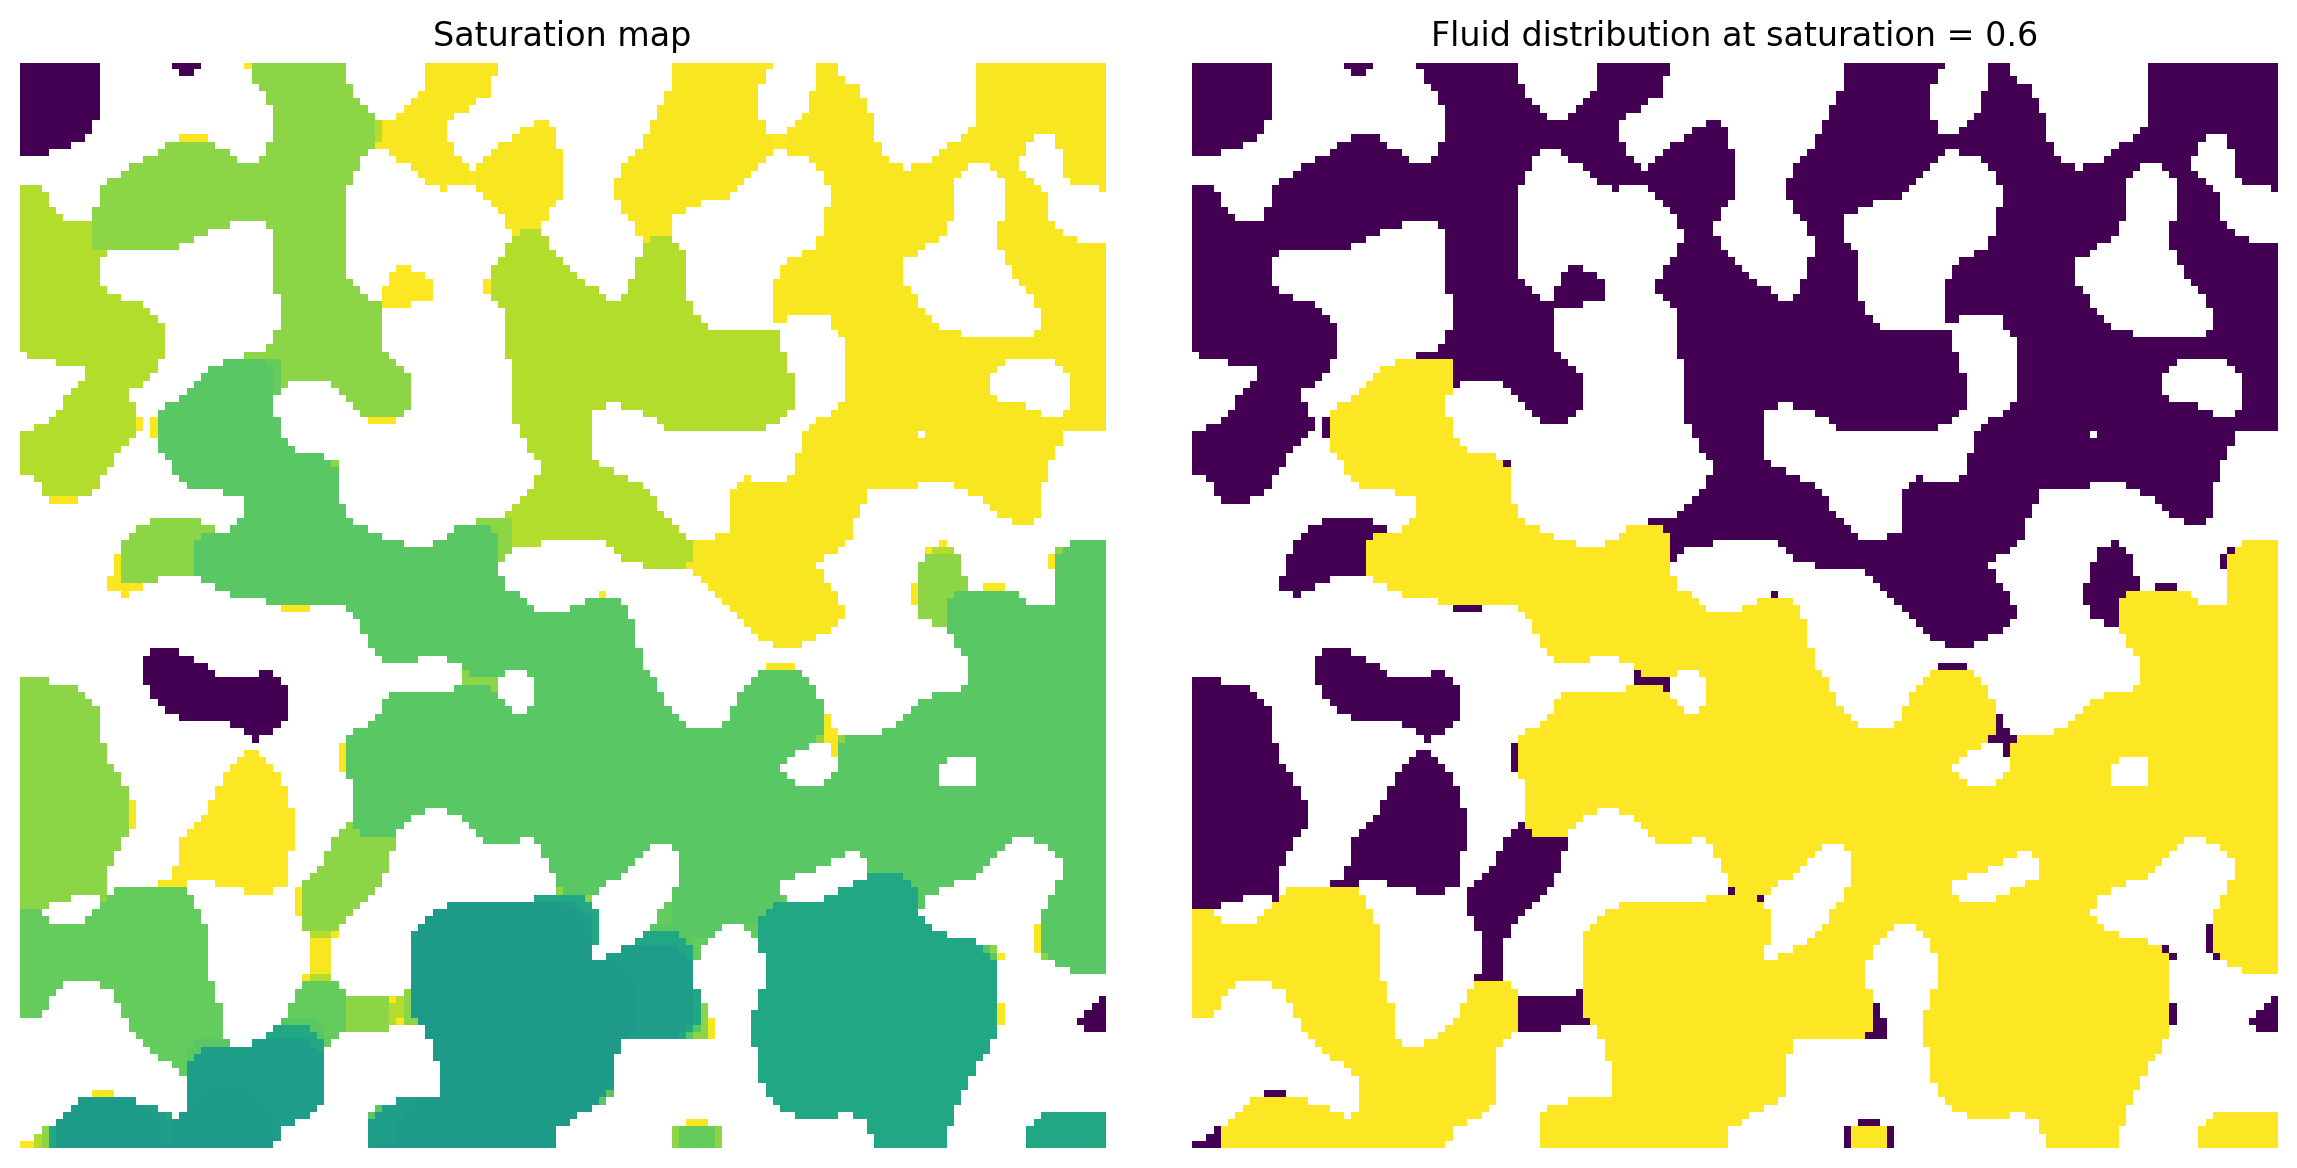

In [2]:
np.random.seed(1)
im = ps.generators.blobs(shape=[150, 150], porosity=0.6, blobiness=1)
pc = ps.filters.capillary_transform(im=im, sigma=0.01, theta=180, g=0)
inlets = np.zeros_like(im)
inlets[0, :] = True
inv = ps.simulations.drainage(im=im, pc=pc, inlets=inlets)

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(inv.im_satn/im, interpolation='none', origin='lower')
ax[0].axis(False)
ax[0].set_title('Saturation map')
ax[1].imshow((inv.im_satn < 0.6)*(inv.im_satn > 0)/im, interpolation='none', origin='lower')
ax[1].axis(False)
ax[1].set_title('Fluid distribution at saturation = 0.6');

## `satn`
This is the output of the invasion function, converted to saturation if needed:

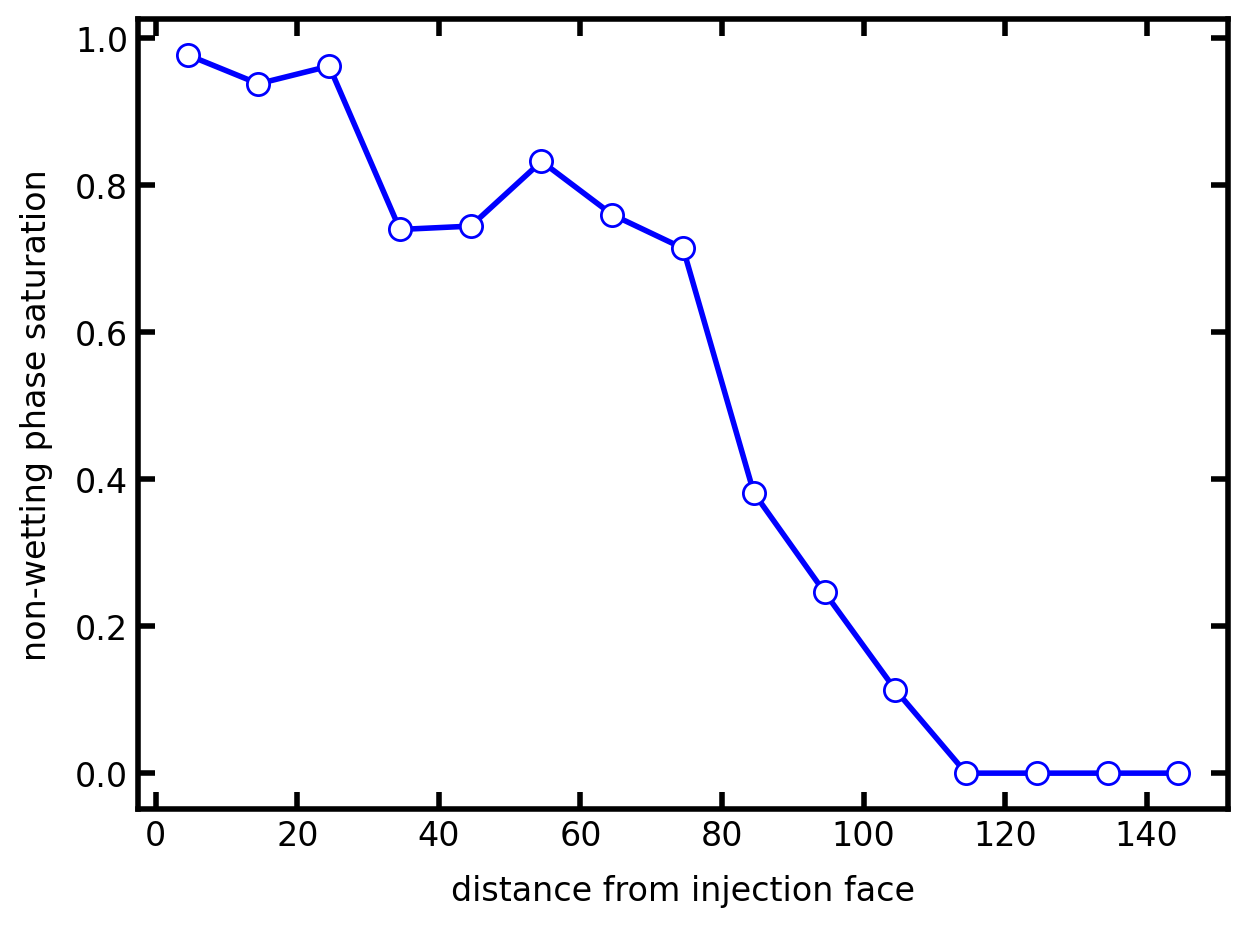

In [3]:
s_prof = ps.metrics.satn_profile(satn=inv.im_satn, s=0.6)
plt.plot(s_prof.position, s_prof.saturation, 'b-o')
plt.xlabel("distance from injection face")
plt.ylabel("non-wetting phase saturation");

## `s`
The global saturation for which the profile should be obtained:

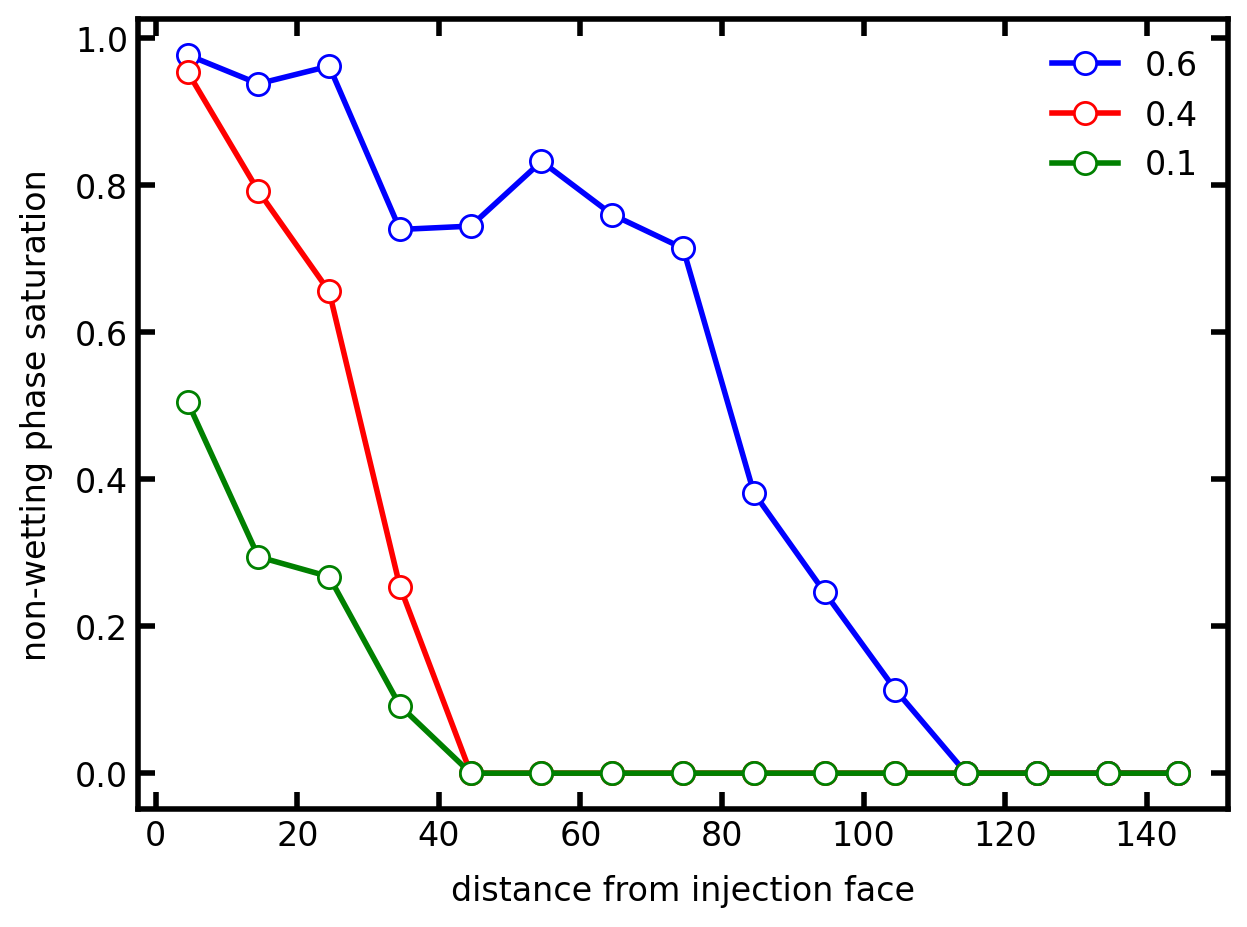

In [4]:
s = 0.6
s_prof1 = ps.metrics.satn_profile(satn=inv.im_satn, s=s)
plt.plot(s_prof1.position, s_prof1.saturation, 'b-o', label=s)

s = 0.4
s_prof2 = ps.metrics.satn_profile(satn=inv.im_satn, s=s)
plt.plot(s_prof2.position, s_prof2.saturation, 'r-o', label=s)

s = 0.1
s_prof3 = ps.metrics.satn_profile(satn=inv.im_satn, s=s)
plt.plot(s_prof3.position, s_prof3.saturation, 'g-o', label=s)

plt.xlabel("distance from injection face")
plt.ylabel("non-wetting phase saturation")
plt.legend();

## `span`
The width of the slice over which the saturation is computed.  The default is 10 voxels.  A higher number makes the curve smoother, but risks losing features like dips and spikes:

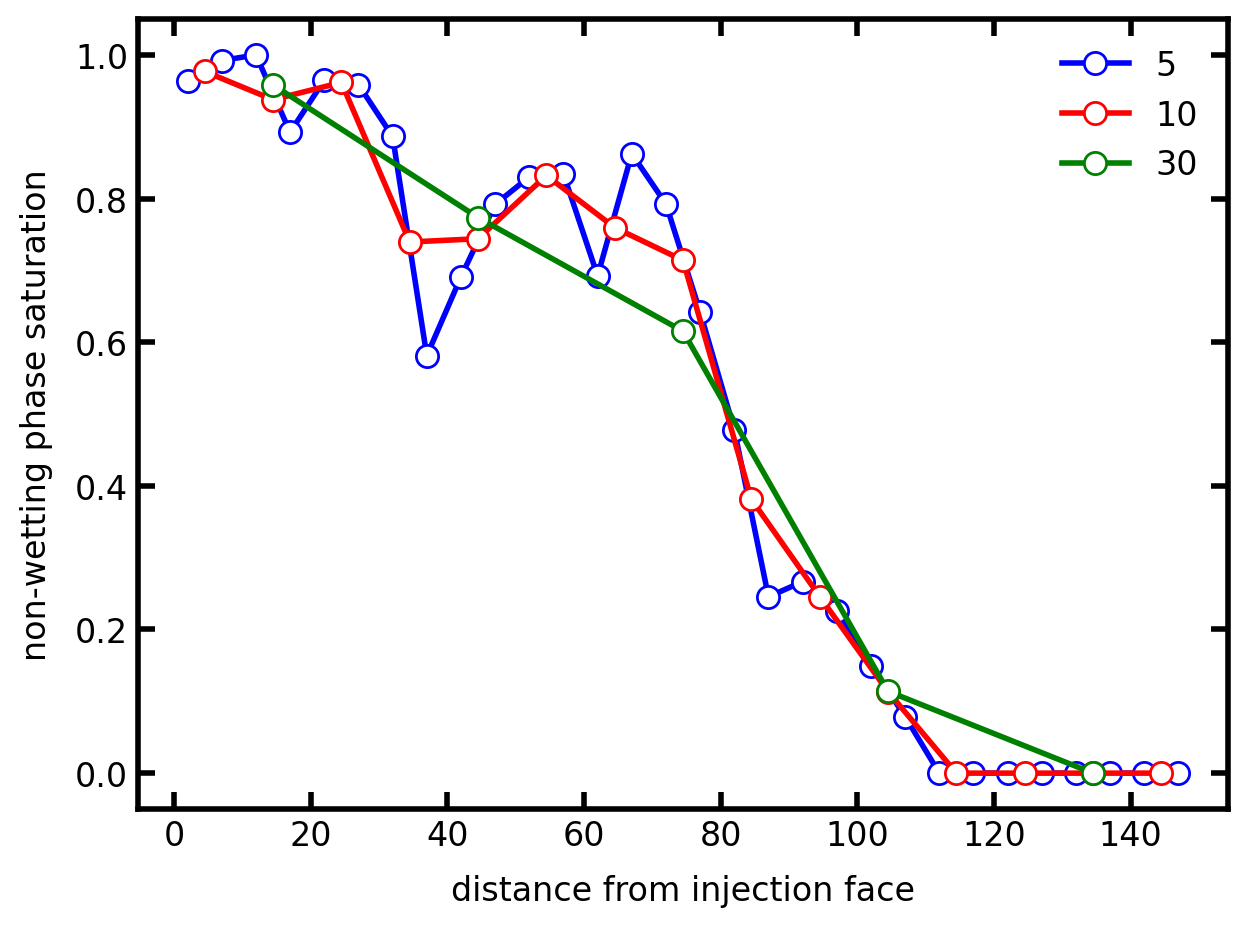

In [5]:
s = 5
s_prof1 = ps.metrics.satn_profile(satn=inv.im_satn, s=0.6, span=s)
plt.plot(s_prof1.position, s_prof1.saturation, 'b-o', label=s)

s = 10
s_prof2 = ps.metrics.satn_profile(satn=inv.im_satn, s=0.6, span=s)
plt.plot(s_prof2.position, s_prof2.saturation, 'r-o', label=s)

s = 30
s_prof3 = ps.metrics.satn_profile(satn=inv.im_satn, s=0.6, span=s)
plt.plot(s_prof3.position, s_prof3.saturation, 'g-o', label=s)

plt.xlabel("distance from injection face")
plt.ylabel("non-wetting phase saturation")
plt.legend();

## `mode`
How the averaging window moves, either by sliding or by tiling. 

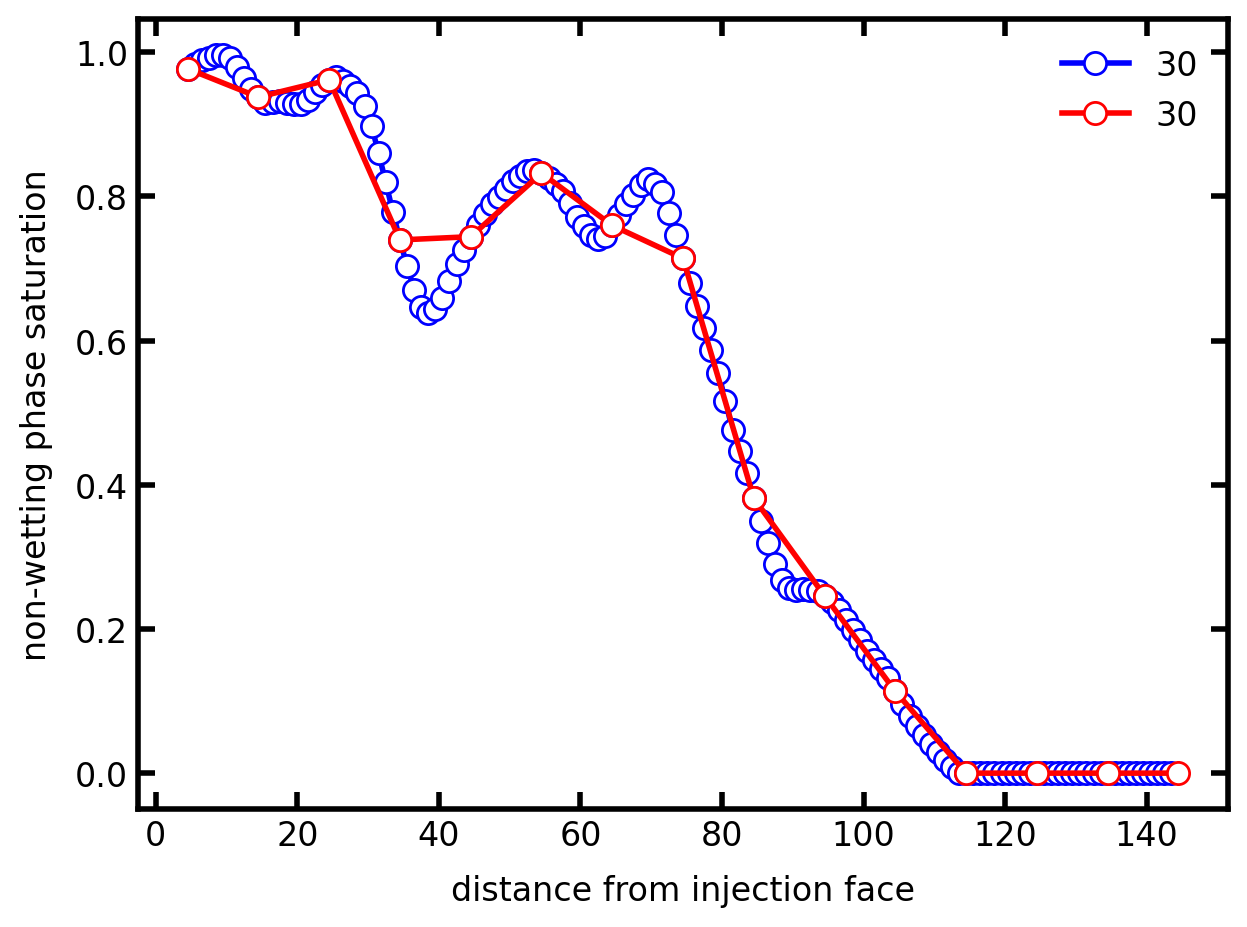

In [6]:
s_prof1 = ps.metrics.satn_profile(satn=inv.im_satn, s=0.6, mode='slide')
plt.plot(s_prof1.position, s_prof1.saturation, 'b-o', label=s)

s_prof2 = ps.metrics.satn_profile(satn=inv.im_satn, s=0.6, mode='tile')
plt.plot(s_prof2.position, s_prof2.saturation, 'r-o', label=s)

plt.xlabel("distance from injection face")
plt.ylabel("non-wetting phase saturation")
plt.legend();

## `axis`
The direction along with the averaging window moves. This can be perpendicular to the axis where the injection occurred to give additional insights into the saturation distribution:

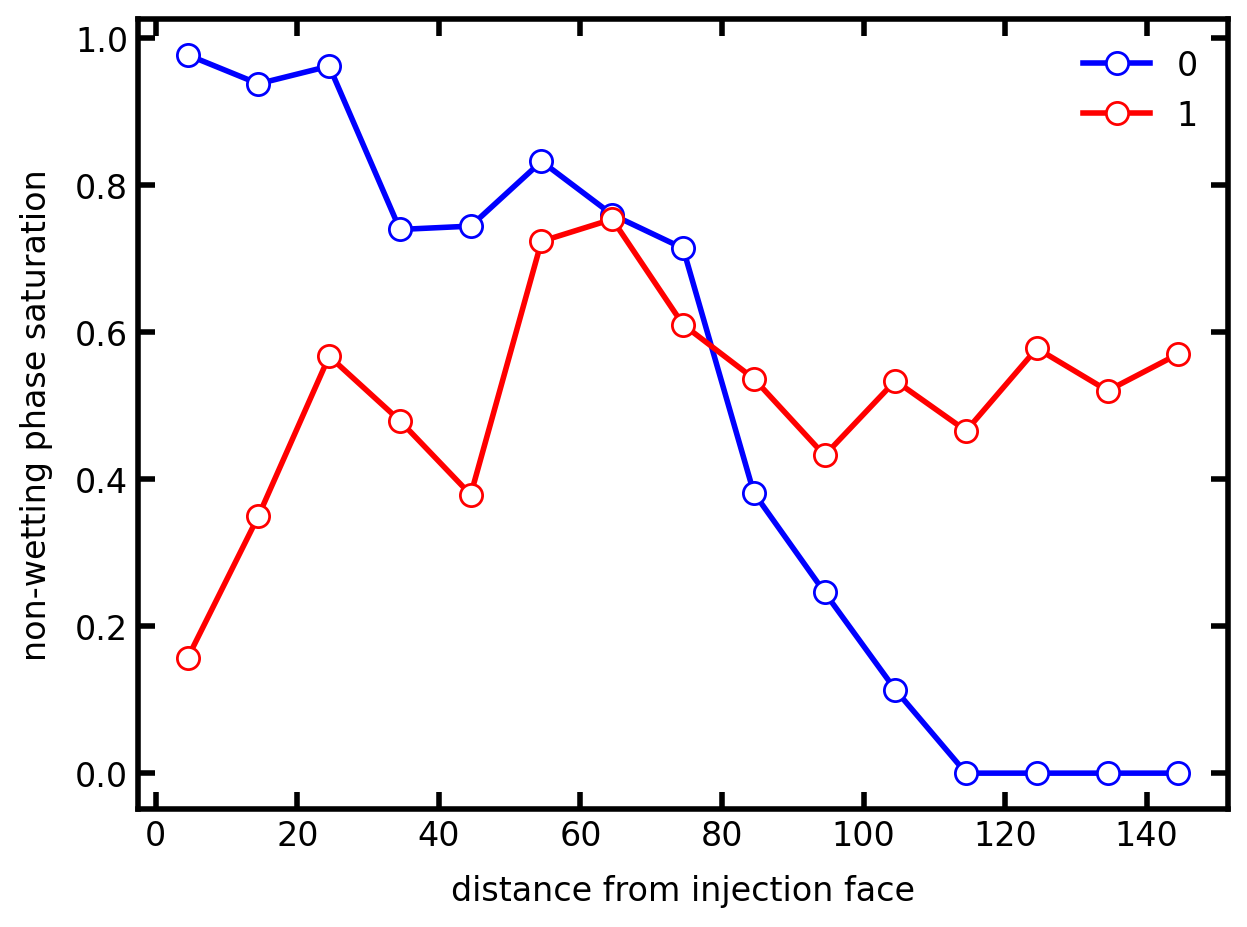

In [7]:
s_prof1 = ps.metrics.satn_profile(satn=inv.im_satn, s=0.6, axis=0)
plt.plot(s_prof1.position, s_prof1.saturation, 'b-o', label=0)

s_prof2 = ps.metrics.satn_profile(satn=inv.im_satn, s=0.6, axis=1)
plt.plot(s_prof2.position, s_prof2.saturation, 'r-o', label=1)

plt.xlabel("distance from injection face")
plt.ylabel("non-wetting phase saturation")
plt.legend();